In [1]:
import pandas as pd

true_df = pd.read_csv(r'C:\Users\Lenovo\Desktop\News _dataset/True.csv')
fake_df = pd.read_csv(r'C:\Users\Lenovo\Desktop\News _dataset/Fake.csv')

In [2]:
print("True News Dataset:")
print(true_df.head())

print("\nFake News Dataset:")
print(fake_df.head())

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake News Dataset:
                                               title  \
0  

In [3]:
true_df['label'] = 0
fake_df['label'] = 1

df = pd.concat([true_df, fake_df], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df.drop(['title', 'subject', 'date'], axis=1, inplace=True)

print(f"\nCombined Dataset Shape: {df.shape}")
print(df.head())


Combined Dataset Shape: (44898, 2)
                                                text  label
0  After months of finding no evidence of Russian...      1
1  The Democratic National Committee announced Fr...      1
2  WASHINGTON (Reuters) - U.S. House of Represent...      0
3  (Reuters) - President-elect Donald Trump said ...      0
4  With the passing of the legendary music icon P...      1


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text

df['text'] = df['text'].apply(preprocess_text)

print("\nPreprocessed Text:")
print(df['text'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Preprocessed Text:
0    months finding evidence russian collusion trum...
1    democratic national committee announced friday...
2    washington reuters us house representatives sp...
3    reuters presidentelect donald trump said wedne...
4    passing legendary music icon prince many going...
Name: text, dtype: object


In [ ]:
pip install wordcloud

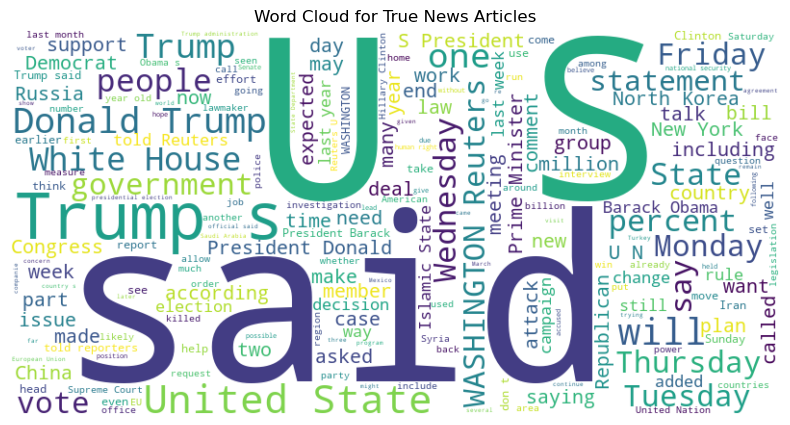

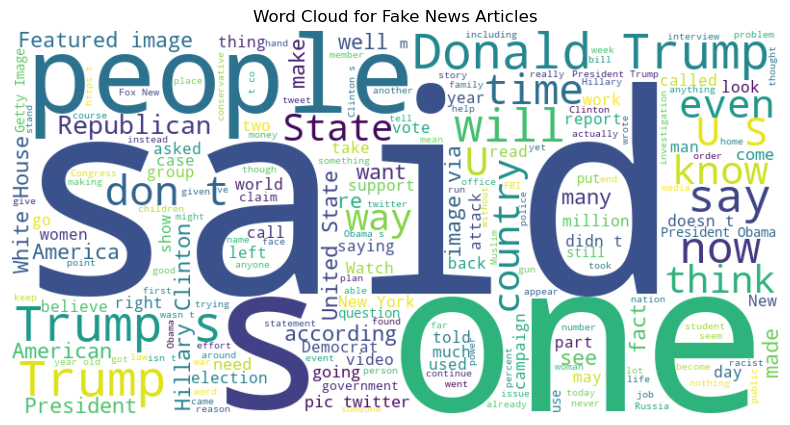

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

true_text = ' '.join(true_df['text'].tolist())
fake_text = ' '.join(fake_df['text'].tolist())

generate_wordcloud(true_text, 'Word Cloud for True News Articles')
generate_wordcloud(fake_text, 'Word Cloud for Fake News Articles')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 35918
Test set size: 8980


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"\nShape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")


Shape of X_train_tfidf: (35918, 5000)
Shape of X_test_tfidf: (8980, 5000)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Multinomial Naive Bayes': MultinomialNB()
}

results = {}

for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train_tfidf, y_train)
  
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
        'classification_report': report
    }
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print('Classification Report:')
    print(report)
    print()

print('Model performance:')
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f'  Accuracy: {metrics["accuracy"]:.4f}')
    print(f'  Precision: {metrics["precision"]:.4f}')
    print(f'  Recall: {metrics["recall"]:.4f}')
    print(f'  F1-score: {metrics["f1-score"]:.4f}')
    print(f'  Classification Report:')
    print(metrics['classification_report'])
    print()

Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.9874
Precision: 0.9904
Recall: 0.9856
F1-score: 0.9880
Classification Report:
              precision    recall  f1-score   support

        Real       0.98      0.99      0.99      4248
        Fake       0.99      0.99      0.99      4732

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training Support Vector Machine...
Model: Support Vector Machine
Accuracy: 0.9930
Precision: 0.9953
Recall: 0.9913
F1-score: 0.9933
Classification Report:
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      4248
        Fake       1.00      0.99      0.99      4732

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Training Random Forest...
Model: Random 

In [11]:
pip install keras tensorflow numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GRU
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_len)

embeddings_index = {}
with open('C:/Users/Lenovo/Desktop/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

models = {
    'Simple Neural Network': Sequential([
        Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ]),
    'Bidirectional LSTM': Sequential([
        Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
        Bidirectional(LSTM(128)),
        Dense(1, activation='sigmoid')
    ]),
    'CNN-LSTM': Sequential([
        Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(pool_size=4),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ]),
    'GRU': Sequential([
        Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_len, trainable=False),
        GRU(128),
        Dense(1, activation='sigmoid')
    ])
}

for model_name, model in models.items():
    print(f'Compiling {model_name}...')
    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

results = {}

for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test), verbose=1)

    y_pred_prob = model.predict(X_test_pad)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1,
        'classification_report': report
    }
    
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print('Classification Report:')
    print(report)
    print()

print('Model performance:')
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f'  Accuracy: {metrics["accuracy"]:.4f}')
    print(f'  Precision: {metrics["precision"]:.4f}')
    print(f'  Recall: {metrics["recall"]:.4f}')
    print(f'  F1-score: {metrics["f1-score"]:.4f}')
    print(f'  Classification Report:')
    print(metrics['classification_report'])
    print()


Training Simple Neural Network...
Epoch 1/10
562/562 [==============================] - 5s 8ms/step - loss: 0.0183 - accuracy: 0.9964 - val_loss: 0.1106 - val_accuracy: 0.9682
Epoch 2/10
562/562 [==============================] - 5s 8ms/step - loss: 0.0153 - accuracy: 0.9974 - val_loss: 0.1328 - val_accuracy: 0.9604
Epoch 3/10
562/562 [==============================] - 5s 8ms/step - loss: 0.0125 - accuracy: 0.9980 - val_loss: 0.1234 - val_accuracy: 0.9687
Epoch 4/10
562/562 [==============================] - 5s 8ms/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 0.1269 - val_accuracy: 0.9669
Epoch 5/10
562/562 [==============================] - 5s 9ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.1285 - val_accuracy: 0.9682
Epoch 6/10
562/562 [==============================] - 6s 10ms/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.1378 - val_accuracy: 0.9638
Epoch 7/10
562/562 [==============================] - 5s 9ms/step - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0